## Исследование данных о российском кинопрокате



<p> 
В данном проекте, производим исследование данных о российском кинопрокате. Заказчик этого исследования — Министерство культуры Российской Федерации. Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. Мы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
</p>

### Шаг 1. Открываем файлы с данными и объединяем их в один датафрейм. 

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
df_mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
df_mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [4]:
df_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
df_mkrf_movies['puNumber'] = np.floor(pd.to_numeric(df_mkrf_movies['puNumber'], errors='coerce')).astype('Int64')

При помощи функции to_numeric преобразовали из тип object в Int64

In [6]:
df_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: I

In [7]:
df_mkrf_movies['puNumber'].isna().sum()

1

Нашли значения NaN

In [8]:
df_mkrf_movies = df_mkrf_movies.dropna(subset=['puNumber']) 

Удалили значение NaN

In [9]:
df_mkrf_movies['puNumber'].isna().sum()

0

In [10]:
df_total = pd.merge(df_mkrf_shows, df_mkrf_movies, how = 'right', on='puNumber')

In [11]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7485 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7485 non-null   object 
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

In [12]:
df_total.head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,221048915,NaN,Открытый простор,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,111013716,NaN,Особо важное задание,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,221038416,NaN,Особо опасен,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,221026916,NaN,Особо опасен,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,221030815,NaN,Особо опасен,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


При помощи метода merge, объеденил два DataFrame

In [13]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7485 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7485 non-null   object 
 3   show_start_date        7485 non-null   object 
 4   type                   7485 non-null   object 
 5   film_studio            7467 non-null   object 
 6   production_country     7483 non-null   object 
 7   director               7476 non-null   object 
 8   producer               6917 non-null   object 
 9   age_restriction        7485 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверяем типы данных

In [14]:
df_total['box_office'] = np.floor(pd.to_numeric(df_total['box_office'], errors='coerce')).astype('Int64')

Преобразовали столбец box_office с типа float64 в int64 чтобы избавиться от экспоненциального формата отображения чисел

In [15]:
df_total['ratings'].isna().sum()

966

В столбце ratings 966 NaN

In [16]:
df_mkrf_movies.loc[(df_mkrf_movies['ratings'].str.contains('%'))&(df_mkrf_movies['ratings'].isna()== False)].sample(5, random_state=1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3446,Короткие истории о любви - 4,126006316,2016-12-30T12:00:00.000Z,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN
5821,Свинья,121007018,2018-04-11T12:00:00.000Z,Художественный,"Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм",Иран,Мани Хагиги,Мани Хагиги,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,94%,"триллер,драма"
3948,Круиз.,211038210,2010-09-03T12:00:00.000Z,Художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"приключения,комедия,фэнтези"
5455,Вечный холод,111006417,2017-08-28T12:00:00.000Z,Художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,"фэнтези,боевик,триллер"
6737,Колесо времени,111003219,2019-03-01T12:00:00.000Z,Художественный,"ООО ""БестМедиа""",Россия,Б.Куломзин,Б.Куломзин,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,98%,"фэнтези,приключения"


Смотрим на значения с % и NaN. И сравниваем с кинопоиском Свинья 94% - 6,4 балла. Круиз 97% - 4,3 балла. То есть данные в процентах не могут быть достоверно сконвертированы в рейтинг, поэтому их удаляем.

In [17]:
df_mkrf_movies['ratings'] = np.floor(pd.to_numeric(df_mkrf_movies['ratings'], errors='coerce')).astype('float64')

In [18]:
df_total['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [19]:
delite = ['99%', '91%', '98%', '94%', '79%', '89%', '90%', '28%', '83%', '64%', '88%', '19%']
df_total = df_total.query("ratings not in @delite")

Проверяем, содержит ли элемент знак %

In [20]:
df_total = df_total[~df_total['ratings'].str.contains('%', na=False)]

In [21]:
df_total['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [22]:
df_total['ratings'] = np.floor(pd.to_numeric(df_total['ratings'], errors='coerce')).astype('float64')

Меняем формат столбца с object на float64

In [23]:
df_total.isna().sum()

puNumber                    0
box_office               4313
title                       0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   966
genres                    972
dtype: int64

In [24]:
df_total.loc[df_total['director'].isna()]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
764,126003512,44350,"Три звезды. Концерт в Waldbuhne Theater, Берли...",2012-12-04T12:00:00.000Z,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
1735,126003413,<NA>,Помпеи. Британский музей,2013-09-11T12:00:00.000Z,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
3839,217027010,<NA>,Зур концерт (Большой концерт).,2010-06-24T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4051,217017310,<NA>,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",2010-04-22T12:00:00.000Z,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
4297,217020610,<NA>,Изге Вэли (Святой Валентин),2010-05-20T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4414,126001710,<NA>,Bon Jovi. The Circle Tour,2010-11-11T12:00:00.000Z,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.0,"концерт,музыка"
4440,214000410,<NA>,Мульт личности. Выпуск 5,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия"
4922,126001111,<NA>,Георг Фридрих Гендель. Мессия. Оратория. Корол...,2011-04-25T12:00:00.000Z,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
4941,126002711,<NA>,Питер Гэбриэл и New Blood Orchestra 3D,2011-11-11T12:00:00.000Z,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.0,"концерт,музыка"


В таблице есть дубликаты, потому что один фильм может получить разные номера удостоверений (кинотеатр и телевидение, например). Так что проверяем и по названию:

In [25]:
missed = df_total.loc[df_total['producer'].isna(),'title']
print('Кол-во записей, где указан продюссер:',df_total.query('title in @missed')['producer'].count())

Кол-во записей, где указан продюссер: 8


In [26]:
titles = df_total.query('title in @missed and ~producer.isna()')['title']
titles

5513            Прощание
5936               Успех
6869    Ложные признания
6898           Валентина
6908            Прощание
7280            Прощание
7321               Успех
7473           Вторжение
Name: title, dtype: object

In [27]:
df_total.query('title in @missed and title in @titles')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
86,111012713,<NA>,Валентина,2013-12-19T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Панфилов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,драма
266,111029414,<NA>,Прощание,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Климов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,драма
309,111027414,<NA>,Успех,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,драма
3267,121034216,1242819,Ложные признания,2016-12-21T12:00:00.000Z,Художественный,"Арт Франс, Идеаль Аудиенс, Маха Продюксьон, Од...",Франция,Люк Бонди,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"драма,комедия"
5429,124002417,<NA>,Вторжение,2017-08-01T12:00:00.000Z,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.0,"фантастика,боевик"
5513,211037617,<NA>,Прощание,2017-09-07T12:00:00.000Z,Художественный,Всероссийский государственный институт кинемат...,Россия,А.Петровская,В.Найговзина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,драма
5936,111008418,<NA>,Успех,2018-06-14T12:00:00.000Z,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,драма
6869,126001119,<NA>,Ложные признания,2019-04-26T12:00:00.000Z,Прочие,Гуд Компани Пикчерз,Дания - США,Катрин Филип,"Рейнхарт Бетц, Пол Видерхольд, Катрин Шальстрём",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.0,"драма,комедия"
6898,112003919,<NA>,Валентина,2019-05-03T12:00:00.000Z,Документальный,"ООО Кинокомпания ""Мастерская""",Россия,Д.Былинушкина,"С.Медведева, Ю.Медведева, М.Стрелкова, В.Черкашин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,драма
6908,111007519,<NA>,Прощание,2019-05-01T12:00:00.000Z,Художественный,ИП Киселев Алексей Евгеньевич,Россия,М.Фомина,А.Киселев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,драма


Все-таки фильмы разные. Поэтому оставляем их.

#### Шаг 2.2. Изучаем пропуски в датафрейме

Изучил пропуски в df, пришел к тому, что заменил пропуски только в столбце ratings медианным значением т к разброс значений не большой и пропусков не слишком много. В других столбцах refundable_support, nonrefundable_support, budget и financing_source оставил значения NaN, т к удалять строки нельзя из-за их кол-ва, заменить другими значениями не представляется возможным, во-первых негде взять данные, во-вторых известных значений слишком мало, чтобы по ним заполнить NaN и в-третьих нет прямой зависимости для их заоплнения, а заполнить их примерно(исказит итоговые результаты). То же самое относится к столбцу box_office. Остальные столбцы со значением NaN, строки в них заменять и удалять не будем, т к их очень мало и они не мешают анализу.

#### Шаг 2.3. Изучаем дубликаты в датафрейме

In [28]:
df_total['title'].value_counts().head(20)

День святого Валентина_                               5
Начало_                                               4
Двойной копец                                         4
Кошки против собак: Месть Китти Галор                 4
Непокоренный.                                         4
Робин Гуд (Robin Hood)                                4
Дом грёз                                              4
Рапунцель: Запутанная история                         4
Секс в большом городе 2                               4
Лузеры                                                4
Там, где живут чудовища                               4
Химера                                                4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
Красавчик-2                                           4
Код доступа "Кейптаун"                                4
Прощание                                              4
Не брать живым /По книге Раджива Чандрасекарана/      4
Жена путешественника во времени                 

In [29]:
colm = ['title', 'film_studio', 'box_office', 'director', 'producer', 'genres']

In [30]:
df_total[colm].duplicated().value_counts()

False    6971
True      485
dtype: int64

In [31]:
df_total[colm] = df_total[colm].drop_duplicates().reset_index(drop=True)

Нашёл дубликаты в столбце title, изучил и удалил дубликаты по одинаковым названиям в столбцах 'title', 'film_studio', 'box_office', 'director', 'producer', 'genres'

In [32]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7456 non-null   int64  
 1   box_office             3129 non-null   Int64  
 2   title                  6944 non-null   object 
 3   show_start_date        7456 non-null   object 
 4   type                   7456 non-null   object 
 5   film_studio            6927 non-null   object 
 6   production_country     7454 non-null   object 
 7   director               6935 non-null   object 
 8   producer               6389 non-null   object 
 9   age_restriction        7456 non-null   object 
 10  refundable_support     330 non-null    float64
 11  nonrefundable_support  330 non-null    float64
 12  budget                 330 non-null    float64
 13  financing_source       330 non-null    object 
 14  ratings                6490 non-null   float64
 15  genr

In [33]:
df_total['puNumber'].value_counts()

221054410    2
221154310    2
122001411    1
121000711    1
121017119    1
            ..
121025916    1
221015415    1
121021814    1
224028210    1
126002916    1
Name: puNumber, Length: 7454, dtype: int64

In [34]:
df_total['show_start_date'] = pd.to_datetime(
    df_total['show_start_date'], format='%Y.%m.%dT%H:%M:%S')

Методом to_datetime() c аргументом format перевели исходный вид даты в приемлемый.

In [35]:
df_total = df_total.rename(columns={'puNumber' : 'pu_number'})

In [36]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   pu_number              7456 non-null   int64              
 1   box_office             3129 non-null   Int64              
 2   title                  6944 non-null   object             
 3   show_start_date        7456 non-null   datetime64[ns, UTC]
 4   type                   7456 non-null   object             
 5   film_studio            6927 non-null   object             
 6   production_country     7454 non-null   object             
 7   director               6935 non-null   object             
 8   producer               6389 non-null   object             
 9   age_restriction        7456 non-null   object             
 10  refundable_support     330 non-null    float64            
 11  nonrefundable_support  330 non-null    float64          

Переименование столбцов методом rename. Убрали разный регистр в названии.

#### Шаг 2.4. Изучаем категориальные значения

In [37]:
df_total['type'].value_counts()

Художественный                4503
 Художественный               1383
Анимационный                   826
Прочие                         404
Документальный                 285
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [38]:
df_total['type'] = df_total['type'].str.strip()

Избавился от пробела перед словом методом .str.strip.

In [39]:
df_total['type'].value_counts()

Художественный                5886
Анимационный                   827
Прочие                         404
Документальный                 285
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [40]:
df_total['producer'].value_counts()

П.Смирнов                                                                                            66
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                                        28
С.Сельянов                                                                                           17
Д.Ловейко, О.Кузовков                                                                                14
Кевин Фейги                                                                                          11
                                                                                                     ..
Р.Граф, Д.М.Лоренц, М.Марш, Д.Миллер, Л.Михайлович, Г.Плайстер, Л.Ролл, С. ван дер Тас, Х.Хименес     1
Татьяна Емельяненко, Игорь Марон, Владимир Хорунжий                                                   1
Синитиро Иноэ                                                                                         1
Пол Бретт, Александра Фергюсон, Саймон Фоусен                   

In [41]:
df_total['director'].value_counts()

О.Семёнова          47
Д.Червяцов          14
Вуди Аллен          13
О.Семёнова          12
Ридли Скотт         12
                    ..
Т.Аленикова          1
Лоуренс Казанофф     1
Джим Гиллеспи        1
Р.Д. Браунштейн      1
Родни Эшер           1
Name: director, Length: 4782, dtype: int64

In [42]:
df_total['genres'].value_counts()

драма                                452
комедия                              331
мелодрама,комедия                    183
драма,мелодрама                      171
драма,мелодрама,комедия              170
                                    ... 
боевик,история                         1
аниме,мультфильм,короткометражка       1
ужасы,триллер,мелодрама                1
боевик,криминал,драма                  1
мультфильм,короткометражка,мюзикл      1
Name: genres, Length: 736, dtype: int64

In [43]:
df_total['genres'].isna().sum()

1473

In [44]:
df_total['director'].isna().sum()

521

In [45]:
df_total['producer'].isna().sum()

1067

Проблема в том, что строки есть длиные и короткие, так же ФИО где-то указано полностью, а где-то в сокращении, где-то указано например "драма", а где-то указано "драма,мелодрама и т д"


#### Шаг 2.5. Проверяем количественные значения

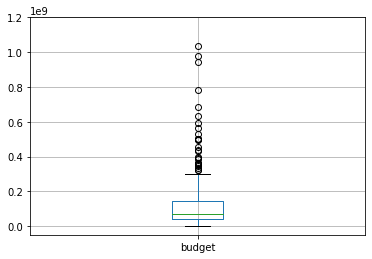

In [46]:
df_total[['budget']].boxplot() 
plt.ylim(-50000000, 1200000000);

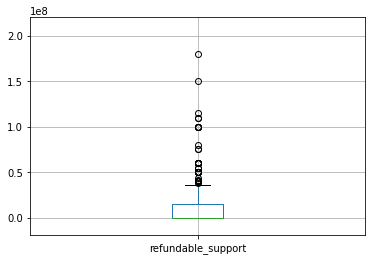

In [47]:
df_total[['refundable_support']].boxplot() 
plt.ylim(-19000000, 220000000);

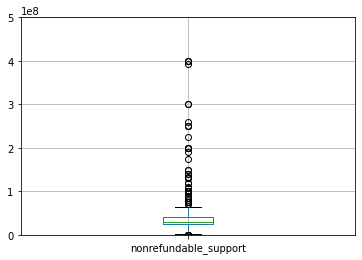

In [48]:
df_total[['nonrefundable_support']].boxplot() 
plt.ylim(-500, 500000000);

Из ящиков в "усами" видно, что есть выбросы

In [49]:
df_total['budget'].value_counts()

0.0            17
38000000.0      6
80000000.0      4
50000000.0      4
37142857.0      3
               ..
49280496.0      1
56693559.0      1
57166797.0      1
109814241.0     1
42252509.0      1
Name: budget, Length: 289, dtype: int64

Есть нулевые значения, в принципе, можно их удалить, ни на что не повлияет, а можно и не удалять, их не так много или заменить на NaN

In [50]:
df_total['refundable_support'].value_counts()

0.0            219
20000000.0      12
10000000.0      10
25000000.0      10
15000000.0       9
5000000.0        9
50000000.0       8
40000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
110000000.0      2
55000000.0       2
19000000.0       2
75000000.0       2
7153119.0        1
35000000.0       1
9000000.0        1
150000000.0      1
36000000.0       1
29000000.0       1
17000000.0       1
180000000.0      1
115000000.0      1
41000000.0       1
26000000.0       1
7000000.0        1
7346881.0        1
3500000.0        1
8000000.0        1
38000000.0       1
44000000.0       1
28000000.0       1
80000000.0       1
Name: refundable_support, dtype: int64

Есть нулевые значения, фильм мог и не получить финансирование.

In [51]:
df_total['nonrefundable_support'].value_counts()

25000000.0    53
30000000.0    48
35000000.0    29
40000000.0    26
20000000.0    19
              ..
23000000.0     1
27500000.0     1
56579055.0     1
8000000.0      1
25900000.0     1
Name: nonrefundable_support, Length: 74, dtype: int64

In [52]:
df_total['budget'].isna().sum()

7126

In [53]:
df_total['refundable_support'].isna().sum() 

7126

In [54]:
df_total['nonrefundable_support'].isna().sum()

7126

budget, refundable_support, nonrefundable_support схожи по NaN и по заполненым значениям т к их одинаковое кол-во, заполнить их все, не представляется возможным, поэтому, эти значения мы оставим NaN. А Соотносятся эти столбцы тем, что из общей суммы бюджета на фильм, часть средств возвратная, а часть нет. 

In [55]:
len(df_total[df_total['budget'] < (df_total['refundable_support'] + df_total['nonrefundable_support'])])

17

In [56]:
budget_0 = df_total[df_total['budget'] < (df_total['refundable_support'] + df_total['nonrefundable_support'])]
budget_0

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2052,111023614,<NA>,С любовью Рози,2014-12-19 12:00:00+00:00,Художественный,"Каньон Креек Филмз, Константин Филм",Россия,Кристиан Диттер,"Саймон Брукс, Дон Кармоди, Роберт Кульцер",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.0,"мелодрама,комедия"
2057,111000415,<NA>,Темнее ночи,2015-01-26 12:00:00+00:00,Художественный,"Селест Фильм, Филмадора Насьональ, Нео Арт",Россия,Генри Бедуэлл,"Алекс Гарсиа, Марко Поло Констандс, Леонардо С...",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.0,ужасы
2471,111017315,581840,Скандинавский форсаж,2015-09-28 12:00:00+00:00,Художественный,Филмкамератене,Россия,Халлвард Браэин,"Свайнунг Голимо, Джон М.Якобсен",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.0,"боевик,комедия"
2531,111009615,<NA>,Олджа (Oldjha),2015-05-26 12:00:00+00:00,Художественный,Берденников Алексей Андреевич,Россия,А.Берденников,А.Берденников,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.0,NaN
2614,114001715,739938,Пингвин нашего времени,2015-07-21 12:00:00+00:00,Анимационный,"ЗАО ""Студия ""Ф.А.Ф."", ИКС-Фильме Креатив Пул Г...",Россия,Штефан Кромер,"Алексей Гуськов, Штефан Арндт, Андреа Шютте",«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.0,"комедия,триллер"
2683,111010215,30200,Маруся (Marussia),2015-06-08 12:00:00+00:00,Художественный,КиноЭлектрон,Россия,Е.Перволовичи,"Я.Крали, С.Сельянов",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.0,"драма,семейный"
2787,111017115,27630900,Три девятки,2015-09-30 12:00:00+00:00,Художественный,"Ворлдвьё Интертейнмент, Анонимус Контент, МэдР...",Россия,Джон Хиллкоут,"Марк Бутан, Бард Доррос, Энтони Катагас",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.0,"криминал,драма,триллер"
2873,111004916,1760990,Опасные каникулы,2016-03-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,О.Беляева,"С.Говорухин, Е.Маскина",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.0,"семейный,детектив,детский"
3046,111008216,<NA>,"Анимационный сериал ""Котяткины истории-2""",2016-04-29 12:00:00+00:00,Художественный,"ООО ""Студия ""Мастер-Фильм""",Россия,Д.Наумов,А.Герасимов,«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.0,NaN
3564,111018116,9968340,Идеаль,2016-12-16 12:00:00+00:00,Художественный,"Леженд Фильм, Оранж Студио, Ле 12 Арт, Нексус ...",Россия,Фредерик Бегбедер,Даррен Аронофски,«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.0,"драма,комедия"


In [57]:
budget_0['budget'] = budget_0.loc[:, 'refundable_support':'nonrefundable_support'].sum(axis=1)
budget_0.head()

/tmp/ipykernel_631/2965114178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_0['budget'] = budget_0.loc[:, 'refundable_support':'nonrefundable_support'].sum(axis=1)


,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2052,111023614,<NA>,С любовью Рози,2014-12-19 12:00:00+00:00,Художественный,"Каньон Креек Филмз, Константин Филм",Россия,Кристиан Диттер,"Саймон Брукс, Дон Кармоди, Роберт Кульцер",«16+» - для детей старше 16 лет,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.0,"мелодрама,комедия"
2057,111000415,<NA>,Темнее ночи,2015-01-26 12:00:00+00:00,Художественный,"Селест Фильм, Филмадора Насьональ, Нео Арт",Россия,Генри Бедуэлл,"Алекс Гарсиа, Марко Поло Констандс, Леонардо С...",«16+» - для детей старше 16 лет,0.0,75000000.0,75000000.0,Фонд кино,6.0,ужасы
2471,111017315,581840,Скандинавский форсаж,2015-09-28 12:00:00+00:00,Художественный,Филмкамератене,Россия,Халлвард Браэин,"Свайнунг Голимо, Джон М.Якобсен",«12+» - для детей старше 12 лет,10000000.0,70000000.0,80000000.0,Фонд кино,7.0,"боевик,комедия"
2531,111009615,<NA>,Олджа (Oldjha),2015-05-26 12:00:00+00:00,Художественный,Берденников Алексей Андреевич,Россия,А.Берденников,А.Берденников,«16+» - для детей старше 16 лет,20000000.0,0.0,20000000.0,Фонд кино,6.0,NaN
2614,114001715,739938,Пингвин нашего времени,2015-07-21 12:00:00+00:00,Анимационный,"ЗАО ""Студия ""Ф.А.Ф."", ИКС-Фильме Креатив Пул Г...",Россия,Штефан Кромер,"Алексей Гуськов, Штефан Арндт, Андреа Шютте",«6+» - для детей старше 6 лет,60000000.0,100000000.0,160000000.0,Фонд кино,4.0,"комедия,триллер"


In [58]:
df_total = pd.concat([df_total, budget_0], ignore_index=True)

Объеденяем два DataFrame


In [59]:
df_total = df_total.drop(df_total[df_total['budget'] < (df_total['refundable_support'] + df_total['nonrefundable_support'])].index)

Удаляем ненужные строки-дубликаты


In [60]:
df_total[df_total['pu_number'] == 114002419]

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7472,114002419,599348,Первая любовь,2019-04-20 12:00:00+00:00,Анимационный,"Ориентал Лайт энд Мэджик, Рекордед Пикчер Комп...",Россия,Такаси Миике,"Мисако Сака, Джереми Томас, Мунэюки Кии",«6+» - для детей старше 6 лет,60000000.0,120000000.0,180000000.0,Фонд кино,6.0,"криминал,боевик"


Обработал строки с 0 бюджетом, заполнив их суммой refundable_support и nonrefundable_support

#### Шаг 2.6. Добавляем новые столбцы

- Создаем столбец с информацией о годе проката. Выделяем год из даты премьеры фильма.

In [61]:
df_total['rental_year'] = df_total.show_start_date.dt.year

Создал столбец с годом проката фильмов

- Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [62]:
df_director = df_total['director'].str.split(',').str.get(0)
df_director.name = "director_one"
final_df = pd.concat([df_total,df_director],axis=1)

Разделил столбец director методом str.split по (','). Переименовал имя Series и соеденил столбцы.

In [63]:
df_genres=df_total['genres'].str.split(',').str.get(0)
df_genres.name = "genres_one"
final_df = pd.concat([final_df,df_genres],axis=1)

Разделил столбец genres методом str.split по (','). Переименовал имя Series и соеденил столбцы.

In [64]:
final_df.head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,rental_year,director_one,genres_one
0,221048915,<NA>,Открытый простор,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.0,"боевик,драма,мелодрама",2015,Кевин Костнер,боевик
1,111013716,<NA>,Особо важное задание,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.0,"драма,военный",2016,Е.Матвеев,драма
2,221038416,<NA>,Особо опасен,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.0,"фантастика,боевик,триллер",2016,Тимур Бекмамбетов,фантастика
3,221026916,<NA>,Остановился поезд,2016-06-10 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",США,В.Абдрашитов,NaN,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.0,драма,2016,В.Абдрашитов,драма
4,221030815,2700,Любовь и голуби,2015-07-29 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",США,В.Меньшов,NaN,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.0,"мелодрама,комедия",2015,В.Меньшов,мелодрама


In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 0 to 7472
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   pu_number              7456 non-null   int64              
 1   box_office             3129 non-null   Int64              
 2   title                  6944 non-null   object             
 3   show_start_date        7456 non-null   datetime64[ns, UTC]
 4   type                   7456 non-null   object             
 5   film_studio            6927 non-null   object             
 6   production_country     7454 non-null   object             
 7   director               6935 non-null   object             
 8   producer               6389 non-null   object             
 9   age_restriction        7456 non-null   object             
 10  refundable_support     330 non-null    float64            
 11  nonrefundable_support  330 non-null    float64          

In [66]:
final_df['director_one'].isna().sum()

521

In [67]:
final_df.dropna(subset = ['director_one'], inplace=True)

In [68]:
final_df['director_one'].isna().sum()

0

In [69]:
final_df.dropna(subset = ['box_office'], inplace=True)
final_df['box_office'].isna().sum()

0

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [70]:
final_df['share_budget'] = round(((final_df['refundable_support'] + final_df[
    'nonrefundable_support']) / final_df['budget']) * 100, 1)
final_df.head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,rental_year,director_one,genres_one,share_budget
4,221030815,2700,Любовь и голуби,2015-07-29 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",США,В.Меньшов,NaN,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.0,"мелодрама,комедия",2015,В.Меньшов,мелодрама,NaN
16,111007513,360,Неподдающиеся,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",2013,Ю.Чулюкин,мелодрама,NaN
17,111027914,420,Неподсуден,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,драма,2014,В.Краснопольский,драма,NaN
20,111003316,380,"Операция ""Ы"" и другие приключения Шурика",2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.0,"комедия,мелодрама,криминал",2016,Л.Гайдай,комедия,NaN
36,221009314,1165,Мужики!..,2014-03-03 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",США - Германия,И.Бабич,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,драма,2014,И.Бабич,драма,NaN


### Шаг 3. Проводим исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [71]:
number_of_films = final_df.groupby('rental_year')['box_office'].count()
number_of_films

rental_year
2010    193
2011    357
2012    143
2013    198
2014    363
2015    441
2016    474
2017    278
2018    442
2019    239
Name: box_office, dtype: int64

Кол-во фильмов по годам

In [72]:
final_df['title'].isna().sum()

0

In [73]:
share_of_films = number_of_films / len(final_df['title'].dropna(how='any'))
share_of_films

rental_year
2010    0.061701
2011    0.114130
2012    0.045716
2013    0.063299
2014    0.116049
2015    0.140985
2016    0.151535
2017    0.088875
2018    0.141304
2019    0.076407
Name: box_office, dtype: float64

Разделим кол-во фильмов на число фильмов без NaN

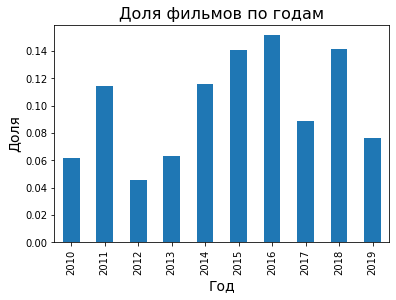

In [74]:
share_of_films.plot(kind = 'bar')
plt.title("Доля фильмов по годам", fontsize = 16)
plt.xlabel("Год", fontsize = 14)
plt.ylabel("Доля", fontsize = 14);

Доля фильмов по годам, из расчётов видно, что с каждым годом доля фильмов увеличивается, но не всегда

- Изучаем, как менялась динамика проката по годам. Посмотрим, в каком году сумма сборов была минимальной и максимальной.

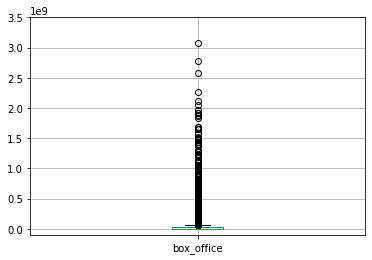

In [75]:
final_df[['box_office']].boxplot()
plt.ylim(-100000000, 3500000000);

По диаграмме размаха видно, что очень большой разброс по сборам, но выбросы удалять не будем, покрайне мере сейчас. Посмотрим на график

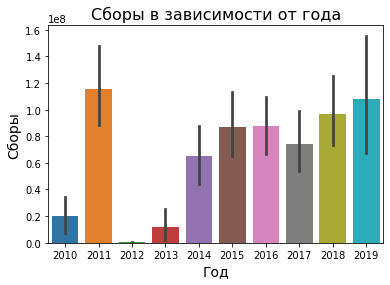

In [76]:
boxplot = sns.barplot(x="rental_year", y="box_office", data=final_df)
boxplot.axes.set_title('Сборы в зависимости от года', fontsize=16)
boxplot.set_xlabel("Год", fontsize=14)
boxplot.set_ylabel("Сборы", fontsize=14);

По графику barplot видно, что в 2012 году сумма сборов была минимальной, а в 2011 году сумма сборов была самой высокой.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [77]:
pivot_table_final_df = final_df.pivot_table(index = 'rental_year', values = 'box_office', aggfunc = ['mean', 'median'])

In [78]:
pivot_table_final_df

,mean,median
,box_office,box_office
rental_year,,
2010,19870951.891192,3890.0
2011,115755716.703081,8727436.0
2012,311815.769231,5760.0
2013,11960747.843434,7637.5
2014,65093814.754821,621050.0
2015,87178451.920635,2284862.0
2016,87404920.255274,4804395.5
2017,74470280.323741,6496742.5


С помощью сводной таблицы посчитал среднюю и медианную сумму сборов для каждого года. По таблице можно заметить, что среднее значение по сумме сборов постоянно прыгает, нет никакой зависимости.

- Определяем, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, с чем это может быть связано.

In [79]:
df_age = df_total['age_restriction'].str.split('-').str.get(0)
df_age.name = "only_age"
final_df = pd.concat([df_total,df_age],axis=1)
final_df['only_age'].value_counts()

«16+»     2843
«18+»     1598
«12+»     1586
«0+»       809
«6+»       620
Name: only_age, dtype: int64

Разделил строки в столбце age_restriction по "-", далее переименовал Series и соеденил две таблицы. <a id='int64'></a>

In [80]:
final_df['only_age'] = final_df['only_age'].replace(to_replace ='[«+»]', value = '', regex = True)
final_df['only_age'] = np.floor(pd.to_numeric(final_df['only_age'], errors='coerce')).astype('int64')

Убрал лишние символы с помощью replace, перевел столбец в формат int64. 

In [81]:
data_pivot_0_18 = final_df.query('rental_year >= 2015').pivot_table(index = 'only_age', 
                                                                    columns='rental_year', 
                                                                    values='box_office', 
                                                                    aggfunc='mean')
data_pivot_0_18

rental_year,2015,2016,2017,2018,2019
only_age,,,,,
0,136475982.0,90366353.190476,75654446.95,116711387.204545,130277600.35
6,84374429.24,63891103.603448,117394536.965517,113675148.523077,53744032.02439
12,62365856.614458,105949904.538462,101930435.341463,94590397.539823,134277110.538462
16,94874798.032468,70230615.425676,76671345.288889,88780192.425926,120240105.815385
18,79281109.052174,102913251.57037,48016719.326531,88673740.991071,100206051.918033


Вывел среднее значение. И средние цифры в зависимости от возрастного ограничения довольно разные и постоянно прыгают, нет четкой динамики роста.

In [82]:
def boxplot_schedule(x1, y1, data1, set_title, set_xlabel, set_ylabel):
    boxplot = sns.barplot(x=x1, y=y1, data=data1)
    boxplot.axes.set_title(set_title, fontsize=16)
    boxplot.set_xlabel(set_xlabel, fontsize=14)
    boxplot.set_ylabel(set_ylabel, fontsize=14);

Функция для построения графиков boxplot

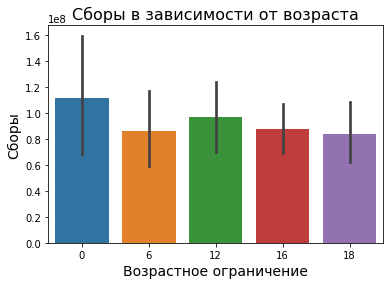

In [83]:
schedule_0_18 = final_df[['rental_year', 'only_age', 'box_office']].query('rental_year >= 2015')
boxplot_schedule('only_age', 
                 'box_office', 
                 schedule_0_18, 
                 'Сборы в зависимости от возраста', 
                 'Возрастное ограничение', 
                 'Сборы'
)

Используя сводную таблицу и ориентируясь на график barplot, мы видим, что на сборы фильма влияет возрастное ограничение, фильмы с ограничением "0+" сборы были самые большие.

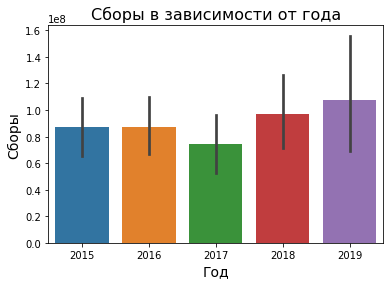

In [84]:
boxplot_schedule('rental_year', 
                 'box_office', 
                 schedule_0_18, 
                 'Сборы в зависимости от года', 
                 'Год', 
                 'Сборы'
)

В зависимости от года, картина на сборы меняется, сборы в 2019 году были самые высокие (пик), а в 2017, самые низкие.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

In [85]:
sum_support = final_df[(final_df['refundable_support'] + final_df['nonrefundable_support']) > 0]
sum_support

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,rental_year,only_age
1278,111005313,<NA>,Петр Ильич Чайковский. Лебединое озеро. Постан...,2013-10-11 12:00:00+00:00,Художественный,Гласс Слиппер Лайв Ивентс,Россия,Росс МакГиббон,NaN,«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.0,NaN,2013,16
1444,111003314,<NA>,Байкеры-3,2014-03-28 12:00:00+00:00,Художественный,Яш Радж Фильмс,Россия,Виджай Кришна Ачария,"Аших Сингх, Адитья Чопра, Санджай Шивалкар",«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,"боевик,триллер,криминал",2014,12
1494,111004213,<NA>,Заклятие,2013-09-10 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Сафран Компан...",Россия,Джеймс Вон,"Дони Дероза-Грюнд, Питер Сафран",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.0,"ужасы,детектив",2013,12
1520,111004314,<NA>,Афтершок,2014-05-05 12:00:00+00:00,Художественный,"Гросс Грек Пикчерз, Драгонфлай Интертейнмент, ...",Россия,Николаз Лопез,"Мигель Асенсио, Брайан Оливер, Элай Рот",«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.0,"триллер,драма,ужасы",2014,16
1788,111004414,97499173,Бёрдмэн,2014-04-23 12:00:00+00:00,Художественный,"Нью Ридженси Пикчерз, Ворлдвейв Интертейнмент,...",Россия,Алехандро Гонсалес Иньярриту,"Алехандро Гонсалес Иньярриту, Джон Лешер, Арно...",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.0,NaN,2014,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,111012117,136355,Вертолёты,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Космосфильм""",Россия,Д.Кубасов,Т.Пендюрин,«16+» - для детей старше 16 лет,20000000.0,40000000.0,60000000.0,Фонд кино,5.0,NaN,2018,16
7469,114001018,<NA>,Колдовское озеро,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""Телевизионное агентство ""ИРТЫШ"" по заказу...",Россия,В.Янковский,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«6+» - для детей старше 6 лет,10000000.0,60000000.0,70000000.0,Фонд кино,5.0,"мелодрама,детектив",2018,6
7470,114003018,<NA>,"Мы живем в России (серия 54 ""Архангельская обл...",2018-08-23 12:00:00+00:00,Анимационный,"ЗАО ""Аэроплан""",Россия,А.Почивалов,Ю.Софронова,«6+» - для детей старше 6 лет,40000000.0,40000000.0,80000000.0,Фонд кино,5.0,NaN,2018,6
7471,114006518,634644321,Шазам!,2018-11-08 12:00:00+00:00,Анимационный,"Уорнер Бразерс, Ди Си Интертейнмент, Ди Си Ком...",Россия,Дэвид Ф.Сэндберг,Питер Сафран,«6+» - для детей старше 6 лет,0.0,138969465.0,138969465.0,Фонд кино,NaN,"фэнтези,боевик,комедия",2018,6


Рассматриваем таблицу по срезу, где сумма support > 0

In [86]:
budget_sum = sum_support.groupby('rental_year')['budget'].sum()
budget_sum

rental_year
2013    2.554354e+08
2014    1.302485e+09
2015    7.684207e+09
2016    7.554943e+09
2017    7.057173e+09
2018    7.000664e+09
2019    1.272287e+10
Name: budget, dtype: float64

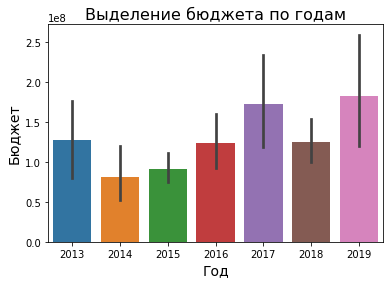

In [87]:
boxplot_schedule('rental_year', 
                 'budget', 
                 sum_support, 
                 'Выделение бюджета по годам', 
                 'Год', 
                 'Бюджет'
)

Из графика barplot видно, что в 2013 году решили влить нормально денег в фильмы, но после, по какой-то причине передумали, но далее из года в год, бюджет на фильмы растет

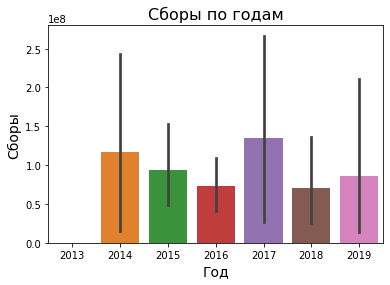

In [88]:
boxplot_schedule('rental_year', 
                 'box_office', 
                 sum_support, 
                 'Сборы по годам', 
                 'Год', 
                 'Сборы'
)

Из графика можно сделать вывод, что сборы в 2014 и 2015 годах привысили бюджет, однако после, по какой-то причине сборы сильно упали, покрайне мере сборы в РФ.

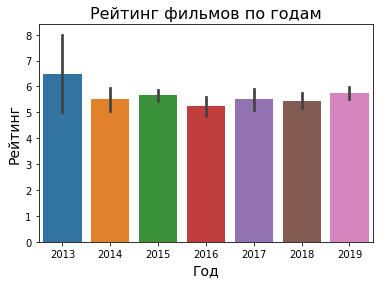

In [89]:
boxplot_schedule('rental_year', 
                 'ratings', 
                 sum_support, 
                 'Рейтинг фильмов по годам', 
                 'Год', 
                 'Рейтинг'
)

График рейтинга фильмов по годам. С каждым годом рейтинги фильмов падают

In [90]:
sum_support.pivot_table(index = 'rental_year', columns = 'only_age', values = 'ratings')

only_age,0,6,12,16,18
rental_year,,,,,
2013,NaN,NaN,5.000000,8.000000,NaN
2014,4.5,5.000000,5.750000,5.666667,6.000000
2015,6.0,5.666667,6.000000,5.405405,5.750000
2016,7.0,4.636364,5.136364,5.550000,5.333333
2017,6.0,5.444444,5.466667,5.300000,6.333333
2018,NaN,5.111111,5.500000,5.263158,6.111111
2019,8.0,6.058824,5.764706,5.481481,5.600000


Из данных выше видно, что рейтинг фильмов немножечко растет из года в год, хотя, на некоторые фильмы с возрастным ограничением рейтинг падает.

In [91]:
sum_support2 = df_total[(df_total['refundable_support'] + df_total['nonrefundable_support']) > 0]
sum_support2['refundable_nonrefundable'] = sum_support2['refundable_support'] + sum_support2['nonrefundable_support']

sum_support2.groupby(sum_support2['genres'].str.split(',').str.get(0))\
                                                                    .agg({'title':'count', 'refundable_nonrefundable':'median'})\
                                                                    .sort_values(by='refundable_nonrefundable')[::-1]

/tmp/ipykernel_631/1161992183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_support2['refundable_nonrefundable'] = sum_support2['refundable_support'] + sum_support2['nonrefundable_support']


,title,refundable_nonrefundable
genres,,
детектив,1,350000000.0
военный,2,237500000.0
приключения,3,90000000.0
мелодрама,15,50145285.0
криминал,4,46750000.0
короткометражка,2,45000000.0
мультфильм,22,43251149.5
детский,2,42500000.0
фантастика,21,40000000.0


Возьмем основной жанр фильма. Создаем столбец, куда запишем сумму поддержек. И по этому столбцу берем медиану.

Детективы и военные фильмы в приоритете, у них наибольшая поддержка от государства.

### Шаг 5. Общий вывод

Данный проект начал с чтения и обработки данных, а именно импортировали нужные нам библиотеки, прочел данные, обработали, объеденили DataFrame. И начали изучение и более детальную обработку данных, применяя различные методы и функции. Добавили нужные нам для работы столбцы в существующий DataFrame. Из года в год кол-во фильмов которые выходят в прокат увеличивается если в 2010 году было 99 фильмов в прокате, то к 2019 году их уже 526 и динамика выхода фильмов растет. На счёт сборов по всем фильмам можно сказать, что сборы постоянно колеблятся, но больше не становятся.Возрастное ограничение по всем фильмам, пользуется большим спросом 0+.На счёт сборов с господдержкой по фильмам можно сказать следующее что в 2014 и 2015 году сумма сборов была больше бюджета на фильм, а после, сборы уменьшались и довольно сильно, хотя бюджет становился больше. Бюджет на фильмы с годом только увеличивается, хоть и не стабильно. Рейтинг на выпущенные фильмы из года в год так же падает, чем больше бюджет, тем выше рейтинг, не смотря на последние 8 баллов :). 
